# PSA demodulation Numpy vs OpenCV
aqui comparamos los tiempos de un demodulador PSA iplementado numpy o openCV

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import timeit

In [16]:
def calculateTestPhasor(z_size=(512, 511), T_period=(30, 30), amplitude=100, bkg = 128, phase_steps = np.zeros(1), sigma_factor=(0.3, 0.3)):
    """!
    @brief this funcion calculates a test phasor for PFA methods
    @details aux function for calculating complex phasors. The phasor is a monochromatic signal of period T
    the modulation is a gaussian centered at 0.5*(norws, ncols) and the maximum amplitude is given by amplitude
    @param z_size [(512, 511)] tuple (NR, NC) px phasor size
    @param T [(30, 30)] tuple (Tx, Ty) px fringe period
    @param sigma_factor [(0.3, 0.3)] tuple modulation sigma_x,sigma_y = sigma_factor * z_size
    @param amplitude [100] GV phasor max amplitude
    @return z  phasor z=m*exp(i*phi)
    @return m phasor modulation = Gauss(0, 0, sigma_x,sigma_y)
    @author AQ 2021
    """
    # setup meshgrid and phasor
    NR, NC = z_size
    x = np.arange(0, NC)
    x = x - 0.5 * NC
    y = np.arange(0, NR)
    y = y - 0.5 * NR

    X, Y = np.meshgrid(x, y)

    # fringe period in Px
    Tx, Ty = T_period

    # phase, background and modulation
    phi = 2 * np.pi * (X / Tx + Y / Ty)
    factor_x, factor_y = sigma_factor
    sigma_x, sigma_y = (factor_x * NC, factor_y * NR)  # px
    m = amplitude * np.exp(-X ** 2 / (2 * sigma_x ** 2) - Y ** 2 / (2 * sigma_y ** 2))
    z = m * (np.cos(phi) + 1j * np.sin(phi))
    
    nIgrams=phase_steps.size
    gList= np.zeros((nIgrams, NR, NC))
    for n in range(nIgrams):
        gList[n] = bkg + m * np.cos(phi+phase_steps[n])
        
    return z, gList, m

In [24]:
zSize=(1500, 3001)
T=(1000/5, 0.001)
w0=np.pi/2
phaseSteps=w0*np.arange(0, 4)
z, gList, m = calculateTestPhasor(z_size=zSize, T_period=T, phase_steps=phaseSteps)

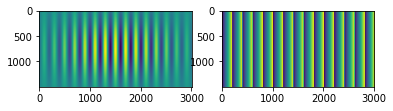

In [32]:
plt.subplot(121);plt.imshow(gList[0]-gList[2]) # expect true color
plt.subplot(122);plt.imshow(np.angle(z)) 
plt.show()

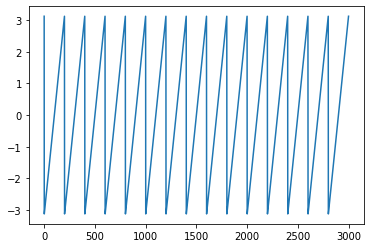

In [26]:
plt.plot(np.angle(z[400, :]))
plt.show()

In [27]:
hPSA4LS=np.array([1, 1j, -1, -1j])

In [28]:
def demodulateNumpy(gList, hPSA):
    nIgrams= hPSA4LS.size
    h=hPSA.reshape(nIgrams, 1, 1)
    z=np.sum(h * gList, axis=0)  
    return z
    

In [29]:
zDNumpy=demodulateNumpy(gList, hPSA4LS)

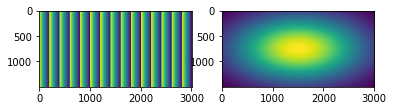

In [48]:
plt.subplot(121);plt.imshow(np.angle(zDNumpy)) # expect true color
plt.subplot(122);plt.imshow(np.abs(zDNumpy))
plt.show()

In [49]:
loop=100
result = timeit.timeit(lambda: demodulateNumpy(gList, hPSA4LS), number=loop)
print(result / loop)

0.18227880099999993


In [77]:
def demodulateOpenCV(gList, hPSA):
    nIgrams, NR, NC = gList.shape
    s=np.zeros((NR, NC))
    c=np.zeros((NR, NC))
    n=0
    for w in hPSA:
        c=cv2.scaleAdd(gList[n], np.real(w), c)
        s=cv2.scaleAdd(gList[n], np.imag(w), s)
        n=n+1
    return c + 1j*s
    

In [78]:
zDCV=demodulateOpenCV(gList, hPSA4LS)

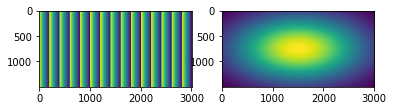

In [79]:
plt.subplot(121);plt.imshow(np.angle(zDCV)) # expect true color
plt.subplot(122);plt.imshow(np.abs(zDCV))
plt.show()

In [76]:
loop=100
result = timeit.timeit(lambda: demodulateOpenCV(gList, hPSA4LS), number=loop)
print(result / loop)

4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)
4 1500 3001
(1500, 3001)


KeyboardInterrupt: 

In [59]:
%whos

Variable              Type        Data/Info
-------------------------------------------
T                     tuple       n=2
calculateTestPhasor   function    <function calculateTestPh<...>or at 0x000001E08E4834C0>
cv2                   module      <module 'cv2' from 'd:\\u<...>kages\\cv2\\__init__.py'>
demodulateNumpy       function    <function demodulateNumpy at 0x000001E0A03758B0>
demodulateOpenCV      function    <function demodulateOpenCV at 0x000001E0A8B6B430>
demosulateOpenCV      function    <function demosulateOpenCV at 0x000001E0A8B6B3A0>
gList                 ndarray     4x1500x3001: 18006000 elems, type `float64`, 144048000 bytes (137.3748779296875 Mb)
hPSA4LS               ndarray     4: 4 elems, type `complex128`, 64 bytes
loop                  int         100
m                     ndarray     1500x3001: 4501500 elems, type `float64`, 36012000 bytes (34.343719482421875 Mb)
np                    module      <module 'numpy' from 'd:\<...>ges\\numpy\\__init__.py'>
phaseSte